In [1]:
import seaborn.objects as so
from seaborn import load_dataset

tips = load_dataset("tips")

The mark draws a **vertical** line:

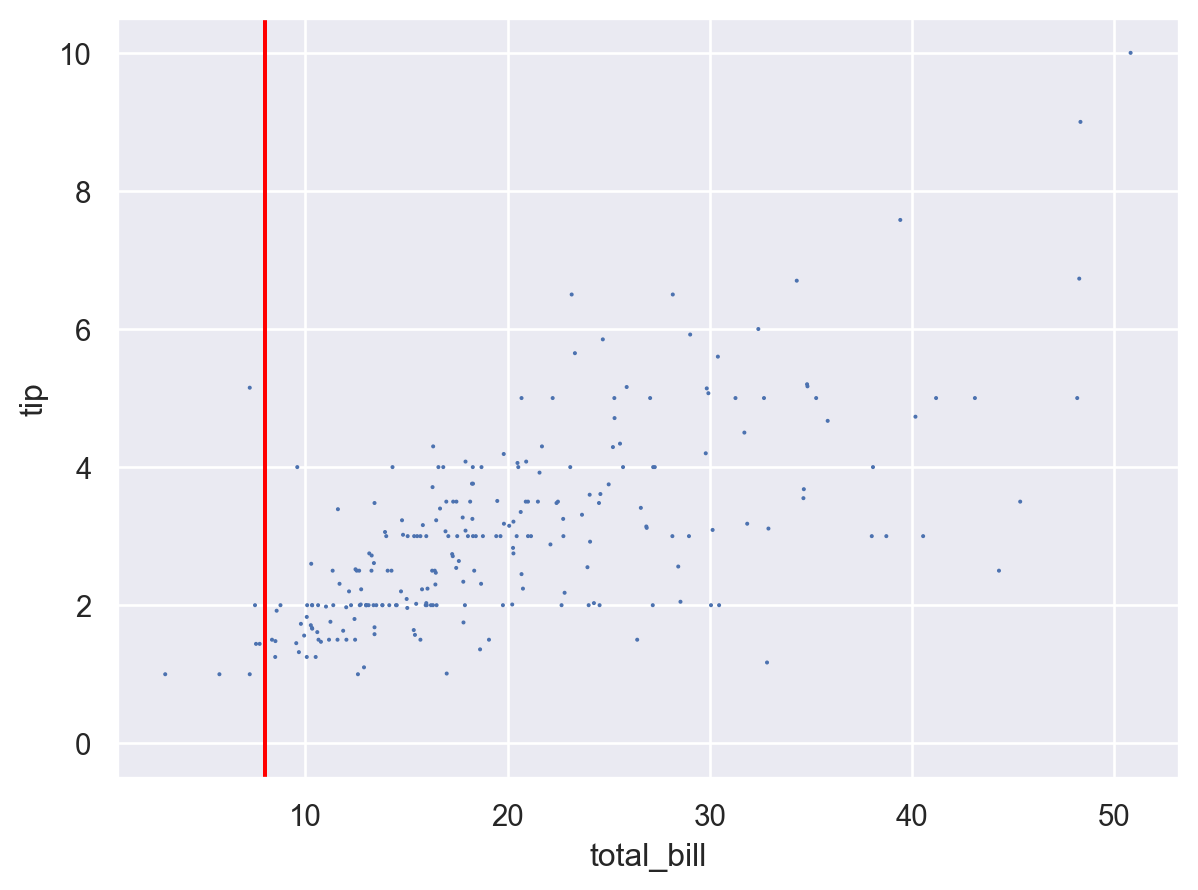

In [2]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1))
    .add(so.Axvline(x = 8, color="red"))  
)

Vertical line position is defined by the `x` property. Running the following command, we will produce a vertical line per row in input dataset:

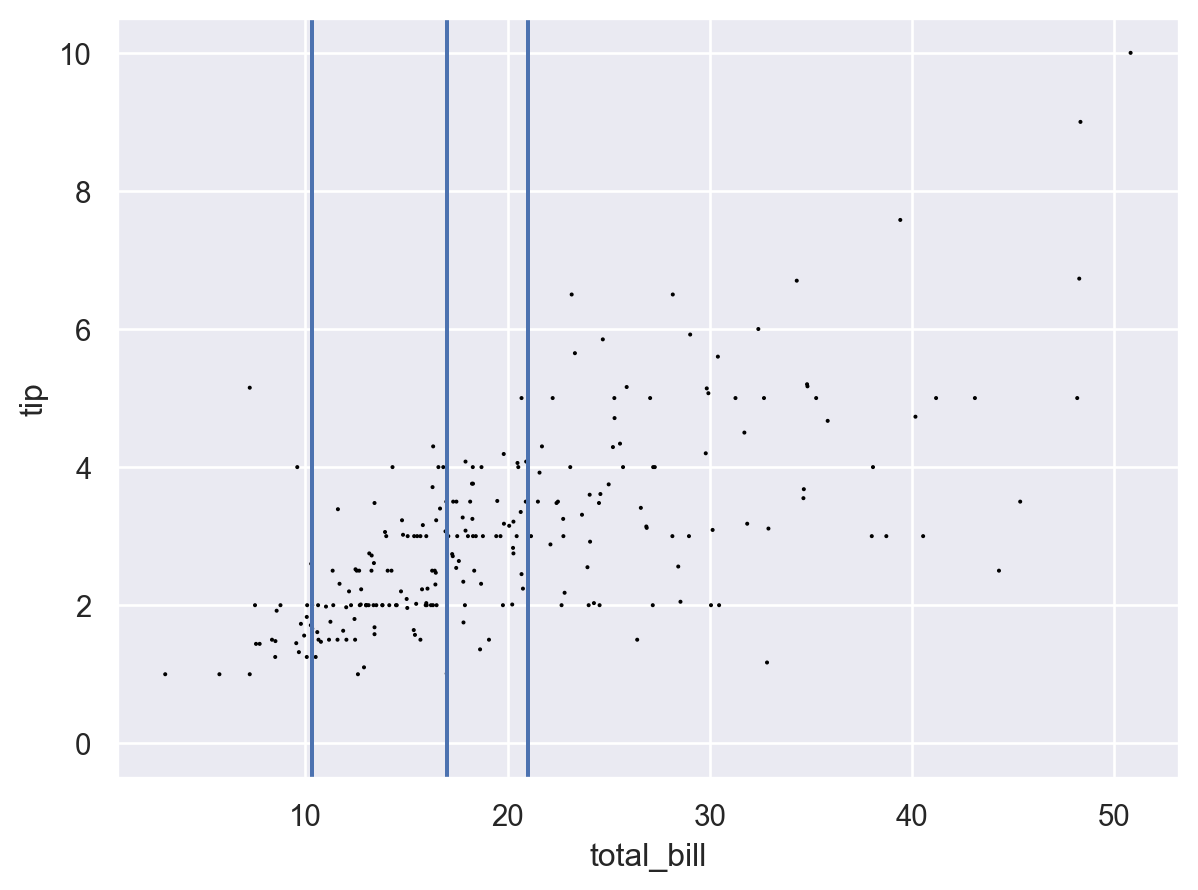

In [3]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(), data=tips.head(3))     # Note: subseting data to not overplot the plot with vertical lines
)

The most common usecase for `so.Axvline()` is to higlight some statistical property of the data, e.g. `mean(x)`. To do so, we need to utilize __aggregation__ function. Do not forget the default setting of, e.g., `Agg` aggregator aggregates the `y` variable. We need to specify the `orient="y"` to let it operate on the `x` variable:


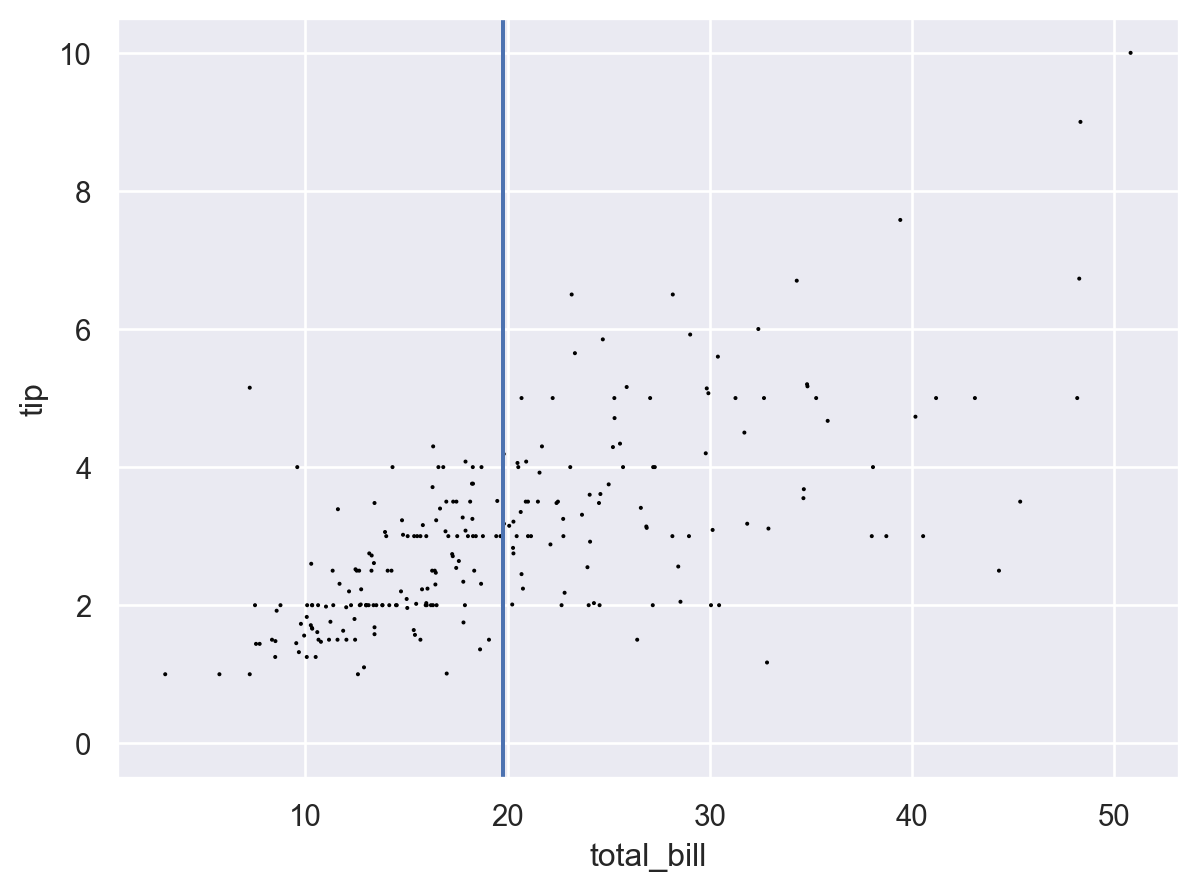

In [4]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(), so.Agg(group_by_orient=False), orient="y")  
)

__Note:__ Not specifying the `group_by_orient` to `False` would use the `y` variable as a grouping variable, too. It would result in overploted chart with one vertical line per distinct `y` value:

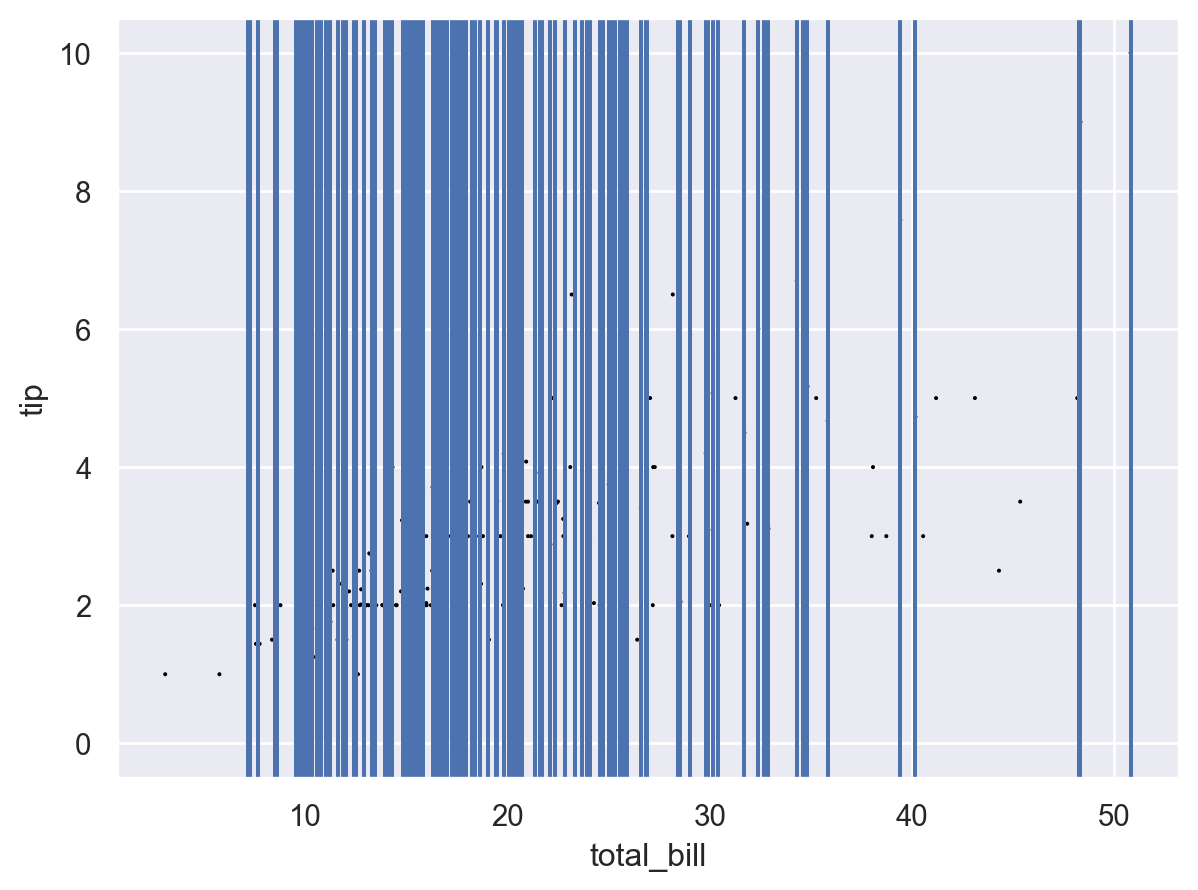

In [5]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(), so.Agg(), orient="y")
)

We can utilize custom aggregator objects `so.AggCustom()` or aggregator `so.Agg2d()` that operates on both `x` and `y` in the same time. Note: for both of them, `group_by_orient` defaults to `False`.

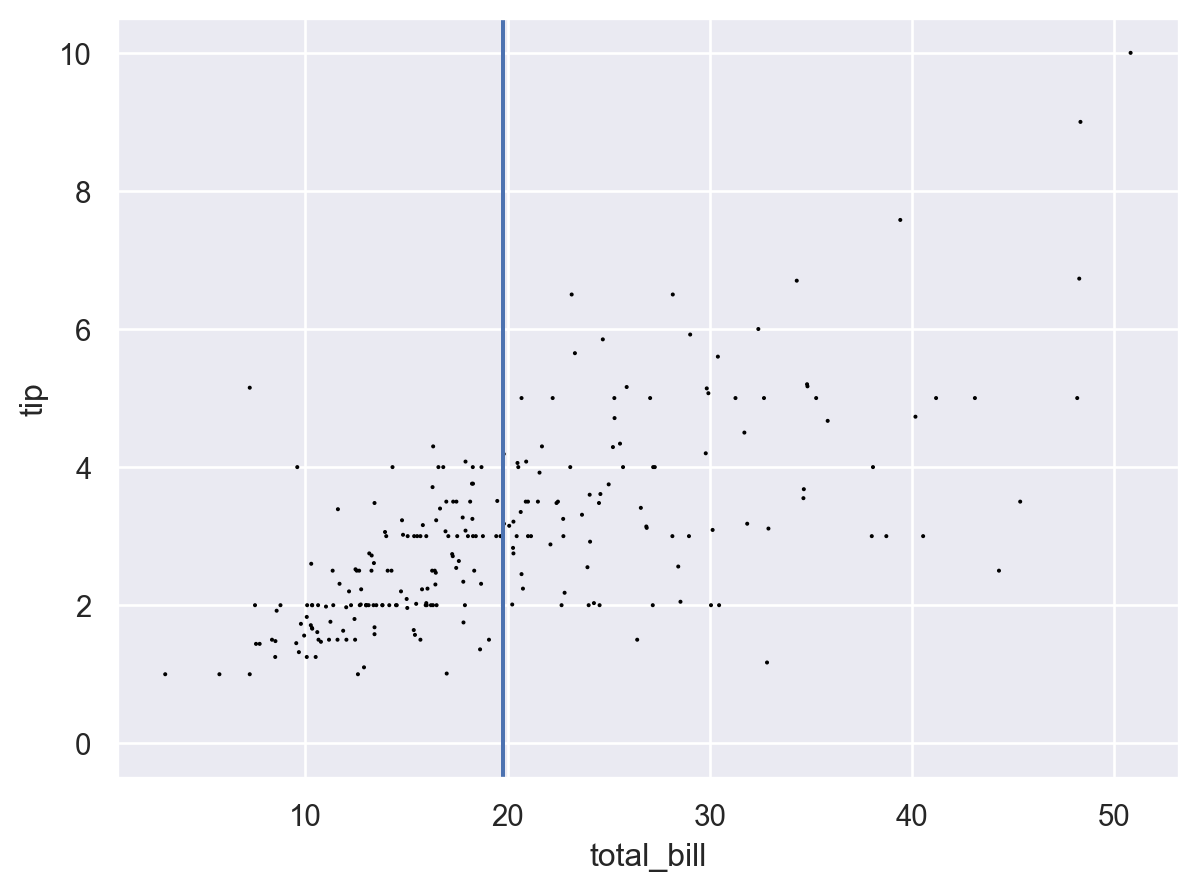

In [6]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(), so.Agg2d())
)

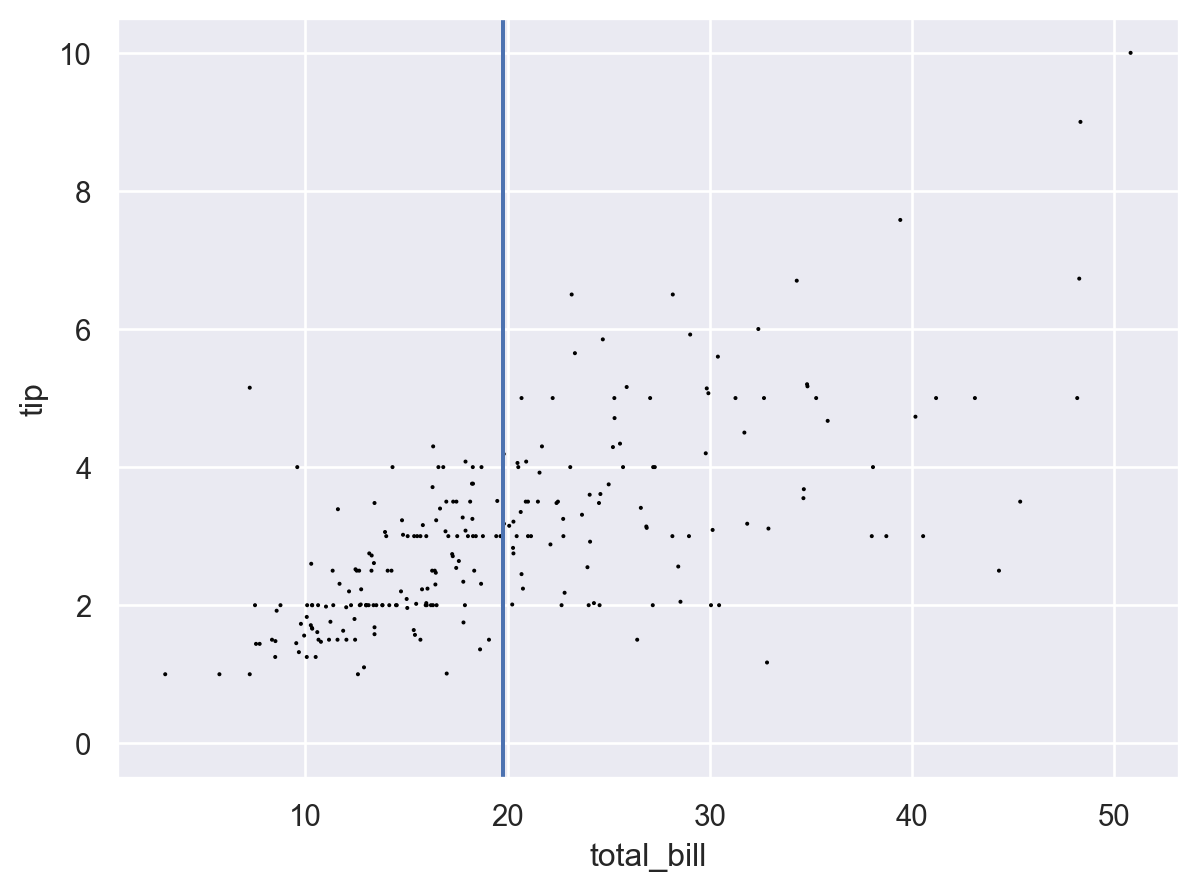

In [7]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(), so.AggCustom(func={"x": "mean"}))
)

__Note__: Do not forget to specify `group_by_orient` to `False`. In other case, the orientation (`x` in this case) will be present both among grouping and aggregated variables which will cause problems.

The `so.Axvline()` inherits from `so.Path()`. Therefore, it's possible to define all the line properties:

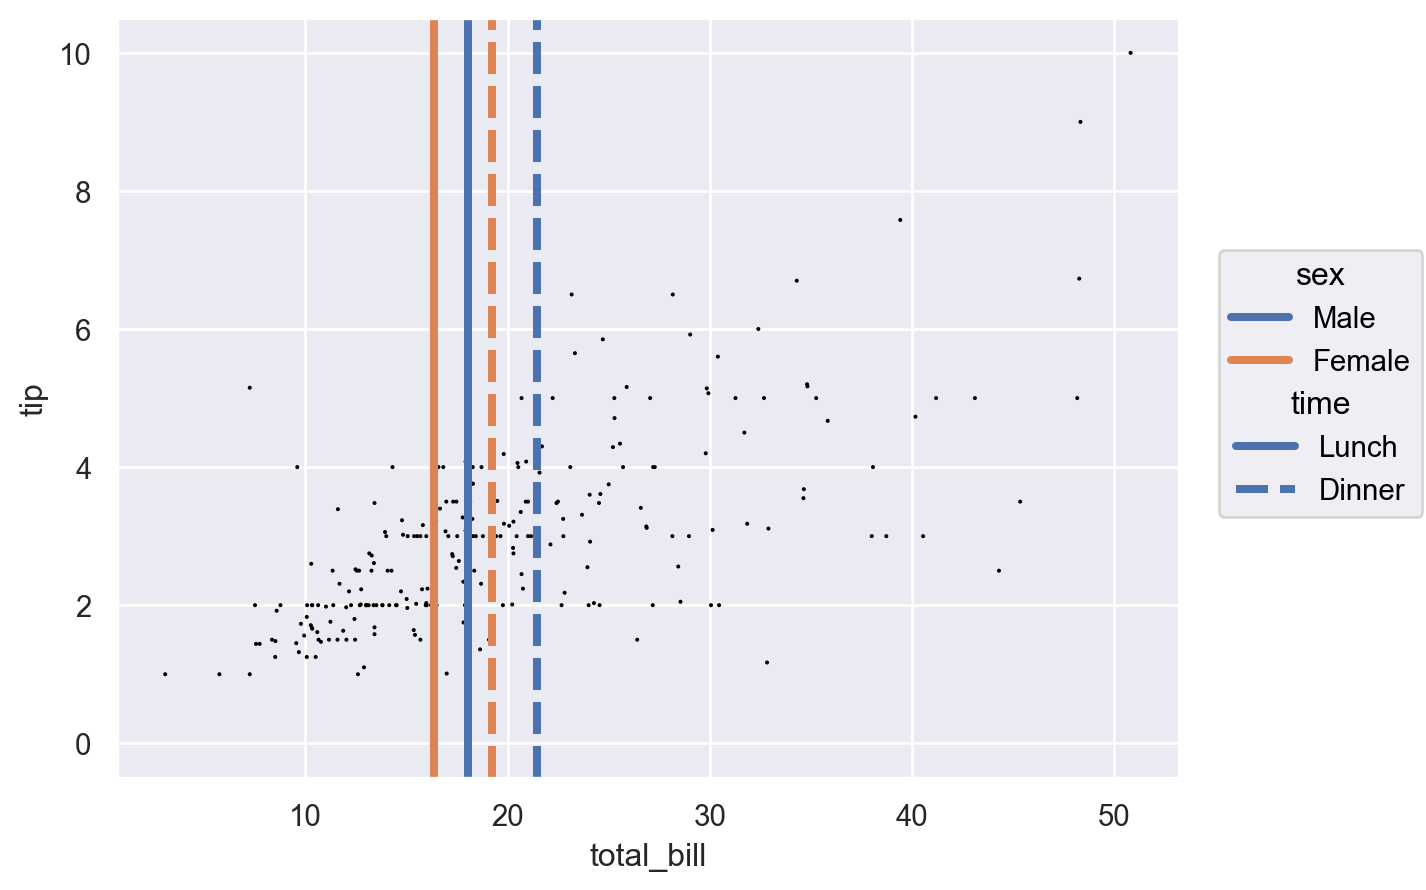

In [8]:
(
    so.Plot(tips, x="total_bill", y="tip")
    .add(so.Dot(pointsize=1, color="black"))
    .add(so.Axvline(linewidth=3), so.Agg(group_by_orient=False), orient="y", color="sex", linestyle="time")
)